In [1]:
# @itsvenu_
# SupportVectorRegression

# For linear regression - ordinary least squares to find minimum error line
# SVR:
# Epsilon-insensitive tube
# errors in this tube are igored
# points outside the tube are considered to find the best tube/line
# points-outside-tube to tube --> minimize these distances
# points-outside-tube --> slack variables 

# This notebook - non-linear SVR [one can choose linear kernels to build linear SVR]

# Feature scling is necessary in SVR
# Beacause we don't have coefficients in this model to compensate for
# high/low values of the features

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [4]:
dat = pd.read_csv('../../data/Position_Salaries.csv')
dat

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
# make X, Y data np array
X = dat.iloc[:, 1:-1].values
Y = dat.iloc[:, -1].values

print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
# because we apply featureScaling for X and Y
# make Y as 2D np.array to fit StandardScaler

Y = Y.reshape(len(Y), 1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [12]:
# we can't apply same SC for both features here
# beacuse mean, sd should be separate for both X and Y

sc_x = StandardScaler()
X = sc_x.fit_transform(X)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
sc_y = StandardScaler()
Y = sc_y.fit_transform(Y)
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [14]:
svr_reg = SVR(kernel='rbf')

In [15]:
svr_reg.fit(X, Y)

/Users/venu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
# reverse the scaling to predict the original values
svr_reg.predict(X)

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [22]:
y_prediction = svr_reg.predict(sc_x.fit_transform([[6.5]]))
sc_y.inverse_transform(y_prediction)

array([131106.77303274])

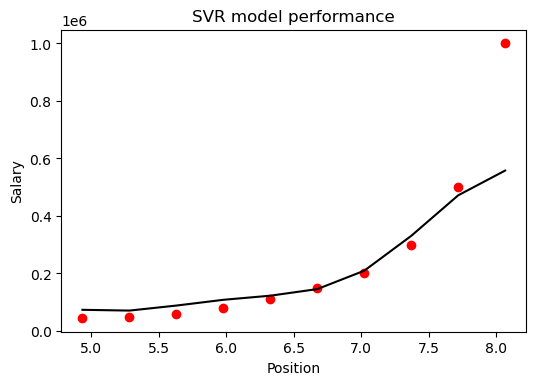

In [29]:
# visualize results

plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color="red")
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('SVR model performance')
# model
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(svr_reg.predict(X)), color='black')
plt.show()

In [30]:
# one can also do high resolution smoother curve
# but this might overfit the data